In [2]:
import pandas as pd
import numpy as np
import os
import scipy as sp
import scipy.signal
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#made by jon katz jk4103

[28.55 47.45 56.3  69.4  76.6  88.25]
[0.24657618 0.40234727 0.4717815  0.56927952 0.61977903 0.69622607]
[3.12398388 1.91451528 1.63274735 1.35311384 1.24286231 1.1063935 ]
[0.06079981 0.16188333 0.22257779 0.32407918 0.38412605 0.48473074]
[ 3.          7.98768902 10.98249075 15.99079858 18.95364691 23.91770982]
[ 3.  8. 11. 16. 19. 24.]


C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # This is added back by InteractiveShellApp.init_path()


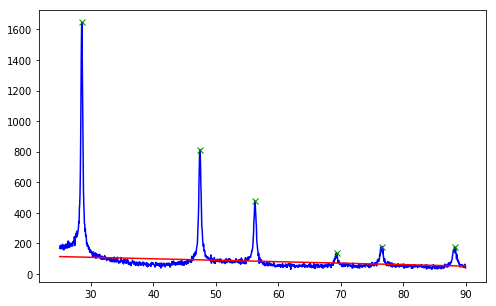

In [4]:
filepath = "C:/Users/Jonathan/Desktop/Mat_Sci_Lab1/XRDstuff/2019-09-05_sample4.txt"

#1 - Chromium
#2 - Copper
#3 - Palladium x
#4 - Silicon 
#5 - Nickel x

def scrub_points(points, delspots, width):
    for delspot in delspots:
        points = np.delete(points, range(delspot-(int(width/2)), delspot+(int(width/2))))
    return points

def findratio(terms):
    ratios = [];
    ratiofit = [];
    for i in range(1, 10):
        testratio = np.divide(terms*i, terms[0])
        testround = np.round(testratio)
        ratios.append(testround)
        ratiofit.append(np.sum(np.abs(testratio-testround)))
    #print(ratiofit)
    return np.argmin(ratiofit)+1



df = pd.read_csv(filepath, skiprows = 129, skipinitialspace=True)

y = np.array(df['Det1Disc1'])

x = np.array(df['Angle'])

peaks, _ = sp.signal.find_peaks(y, prominence = 80, distance = 60)

nopeak_x = scrub_points(x, peaks, 300)

nopeak_y = scrub_points(y, peaks, 300)

#Linear regression to find background

model = LinearRegression(fit_intercept=True)
model.fit(nopeak_x[:, np.newaxis], nopeak_y)

xfit = np.linspace(np.min(x), np.max(x), 50)
yfit = model.predict(xfit[:, np.newaxis])

#plot time

plt.figure(figsize=(8,5))

plt.plot(x, y, 'b-')

plt.plot(x[peaks], y[peaks], "gx")

plt.plot(xfit, yfit, 'r-');

peaksines = np.sin(np.radians(x[peaks]/2))

d_vals = (1.5406/(peaksines*2))

peakpoints = np.power(peaksines, 2)

bestratio = findratio(peakpoints)

finalratio = (np.divide(peakpoints*bestratio, peakpoints[0]))

roundedratio = np.round(finalratio)

print(x[peaks])

print(peaksines)

print(d_vals)

print(peakpoints)

print(finalratio)

print(roundedratio)

In [92]:
y_nobck = model.predict(x)

plt.figure(figsize=(8,5))

plt.plot(x, y_nobck, 'b-')

plt.plot(x[peaks], y_nobck[peaks], "gx")

ValueError: Expected 2D array, got 1D array instead:
array=[ 10.    10.02  10.04 ... 109.96 109.98 110.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:
print(np.s_[4, 6])

(4, 6)
